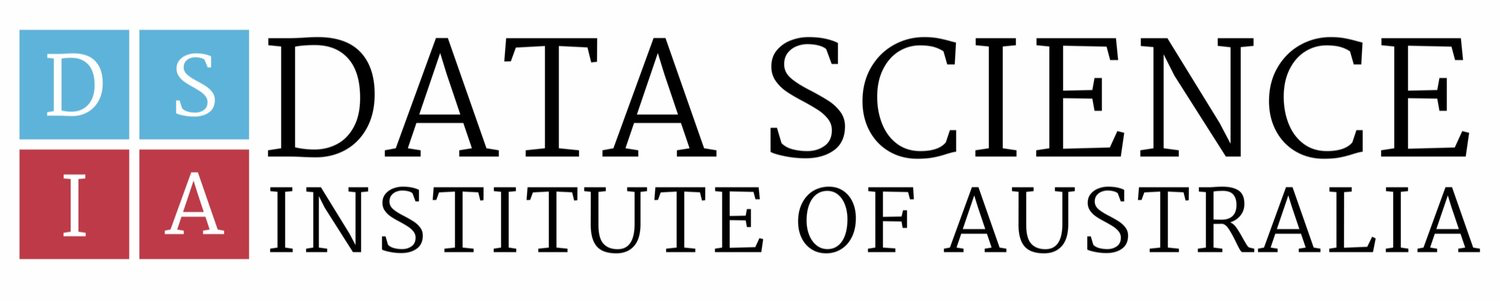

# Data Science and AI
## Lab 6.5: Hierachical Clustering

INSTRUCTIONS:

- Run the cells
- Observe and understand the results
- Answer the questions

Based on the article "[**SciPy Hierarchical Clustering and Dendrogram Tutorial**](https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/)" posted on 26th August 2015 by **Jörn Hees**

# Hierachical Clustering
One of the benefits of hierarchical clustering is that it is not necessary to know the number of clusters `k` of the  data in advance.

## Naming conventions
- `X`: samples (n by m array), aka data points or "singleton clusters"
- `n`: number of samples
- `m`: number of features
- `Z`: cluster linkage array (contains the hierarchical clustering information)
- `k`: number of clusters

In [1]:
## Import Libraries

import numpy as np

from scipy.cluster.hierarchy import dendrogram, linkage

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# suppress scientific float notation
np.set_printoptions(precision=5, suppress=True)

## Generating Sample Data
The data must be in a matrix `X` with `n` samples and `m` features, so that `X.shape == (n, m)`.

In [3]:
## Generate the data
# generate two clusters
# - `a` with 100 points
# - `b` with 50 points

# for repeatability of this tutorial
np.random.seed(4711)

a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100, ])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50, ])
X = np.concatenate((a, b))

In [4]:
## Check data

# About X
print('X is a %s' % type(X))
print('X has %d rows and %d columns' % X.shape)
print('')
print('Sample of X%s' % ('_'*50))
print(X[:5])

X is a <class 'numpy.ndarray'>
X has 150 rows and 2 columns

Sample of X__________________________________________________
[[ 9.21188 -0.15189]
 [ 8.88937 -0.33937]
 [10.7684   2.95245]
 [ 8.24213  1.29095]
 [ 5.7967  -5.83777]]


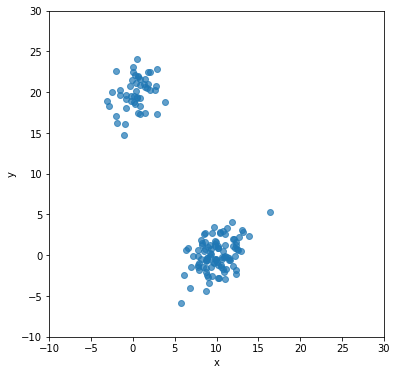

In [5]:
plt.figure(figsize=(6, 6))

plt.scatter(X[:, 0], X[:, 1], alpha=0.7)

plt.xlim(-10, 30)
plt.ylim(-10, 30)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Perform the Hierarchical Clustering
From the **SciPy** linkage docs, `ward` is one of the methods that can be used to calculate the distance between newly formed clusters. The `ward` causes `linkage()` to use the [Ward variance minimization algorithm](https://en.wikipedia.org/wiki/Ward%27s_method).

Other common linkage methods are `single`, `complete`, `average`. Some different distance metrics are `euclidean` (default), `cityblock` (aka Manhattan), `hamming`, and `cosine`amongst others.

The `linkage()` function will use the specified **method** and **metric** to calculate the distances of the clusters (starting with the `n` individual samples (data points) as singleton clusters)).

In each iteration it will merge the two clusters which have the smallest distance according the selected method and metric.

It will return an array of length `n - 1` giving the information about the `n - 1` cluster merges which it needs to pairwise merge `n` clusters.

`Z[i]` will tell which clusters were merged in the i-th iteration.

In [6]:
# generate the linkage matrix
Z = linkage(X, 'ward')

In [7]:
print(Z.shape)

(149, 4)


In [8]:
Z[:5, :]

array([[52.     , 53.     ,  0.04151,  2.     ],
       [14.     , 79.     ,  0.05914,  2.     ],
       [33.     , 68.     ,  0.07107,  2.     ],
       [17.     , 73.     ,  0.07137,  2.     ],
       [ 1.     ,  8.     ,  0.07543,  2.     ]])

Side note: The [Cophenetic Correlation Coefficient](https://en.wikipedia.org/wiki/Cophenetic_correlation) and the `cophenet()` function.

Briefly, this approach compares (correlates) the actual pairwise distances of all the samples to those implied by the hierarchical clustering. The closer the value is to 1, the better the clustering preserves the original distances.

In [9]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(X))
print('Cophenetic Correlation Coefficient: %.3f' % c)

Cophenetic Correlation Coefficient: 0.980


In [10]:
def print_Z(Z):
    if Z.ndim == 1:
        Z = np.array((Z, ))
    print('  # Index 1 Index 2 Distance Sample Count')
    print('--- ------- ------- -------- ------------')
    for i in range(len(Z)):
        print('%3d %7.0f %7.0f %8.5f %12.0f' % ((i,) + tuple(Z[i])))

In [11]:
# check the first two points that were merged
print(Z[0])

# give it some formating
print()
print_Z(Z[0])

[52.      53.       0.04151  2.     ]

  # Index 1 Index 2 Distance Sample Count
--- ------- ------- -------- ------------
  0      52      53  0.04151            2


In its first iteration the linkage algorithm decided to merge the two clusters (originaly data points) with indices _52_ and _53_, as they only had a distance of _0.04151_. This created a cluster with a total of _2_ samples.

In [12]:
# check the second two points that were merged
print_Z(Z[1])

  # Index 1 Index 2 Distance Sample Count
--- ------- ------- -------- ------------
  0      14      79  0.05914            2


In the second iteration the algorithm decided to merge the clusters (original samples here as well) with indices _14_ and _79_, which had a distance of _0.05914_. This again formed another cluster with a total of _2_ samples.

The indices of the clusters until now correspond to the samples. Remember that there are a total of 150 samples, so indices 0 to 149. The first 20 iterations are:

In [13]:
# check the fist 20 points that were merged
print_Z(Z[:20])

  # Index 1 Index 2 Distance Sample Count
--- ------- ------- -------- ------------
  0      52      53  0.04151            2
  1      14      79  0.05914            2
  2      33      68  0.07107            2
  3      17      73  0.07137            2
  4       1       8  0.07543            2
  5      85      95  0.10928            2
  6     108     131  0.11007            2
  7       9      66  0.11302            2
  8      15      69  0.11429            2
  9      63      98  0.12120            2
 10     107     115  0.12167            2
 11      65      74  0.12490            2
 12      58      61  0.14028            2
 13      62     152  0.17260            3
 14      41     158  0.17790            3
 15      10      83  0.18635            2
 16     114     139  0.20419            2
 17      39      88  0.20628            2
 18      70      96  0.21931            2
 19      46      50  0.22049            2


Until iteration _13_ the algorithm only directly merged original samples.

Also, there is a monotonic increase of the distance.

In iteration _13_ the algorithm decided to merge cluster indices _62_ and _152_.

The index _152_ looks wrong as the original sample have indices from _0_ to _149_ for the _150_ samples.

All indices `idx >= len(X)` actually refer to the cluster formed in `Z[idx - len(X)]`.

This means that while index _149_ corresponds to `X[149]` that index _150_ corresponds to the cluster formed in `Z[0]`, index _151_ to `Z[1]`, _152_ to `Z[2]`, and so on.

Hence, the merge iteration _13_ merged sample _62_ to samples _33_ and _68_ that were previously merged in iteration _2_ `(152 - 2)`.

In [14]:
# original points' data
X[[33, 68, 62]]

array([[ 9.83913, -0.4873 ],
       [ 9.89349, -0.44152],
       [ 9.97793, -0.56383]])

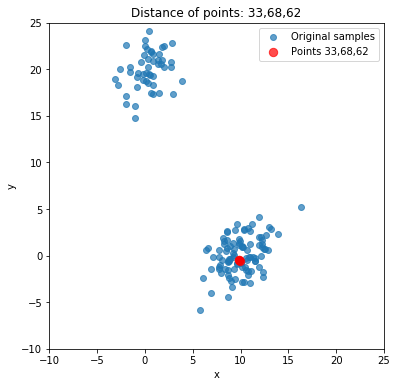

In [15]:
# Distance of points 33, 68 and 62
plt.figure(figsize = (6, 6))

idxs = [33, 68, 62]
# plot all points
plt.scatter(X[:, 0], X[:, 1], alpha=0.7, label='Original samples')
# plot interesting points in red again
plt.scatter(X[idxs, 0], X[idxs, 1], s=70, c='r', alpha=0.7,
            label='Points %s' % ','.join([str(x) for x in idxs]))

plt.title('Distance of points: %s' % ','.join([str(x) for x in idxs]))
plt.xlim(-10, 25)
plt.ylim(-10, 25)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

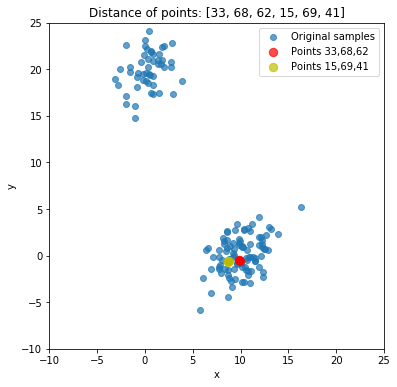

In [16]:
# Distance of points 33, 68, 62, 15, 69 and 41
plt.figure(figsize = (6, 6))

idxa = [33, 68, 62]
# plot all points
plt.scatter(X[:, 0], X[:, 1], alpha=0.7, label='Original samples')
# plot interesting points in red again
plt.scatter(X[idxa, 0], X[idxa, 1], s=70, c='r', alpha=0.7,
            label='Points %s' % ','.join([str(x) for x in idxa]))
idxb = [15, 69, 41]
plt.scatter(X[idxb, 0], X[idxb, 1], s=70, c='y', alpha=0.7,
            label='Points %s' % ','.join([str(x) for x in idxb]))
plt.title('Distance of points: %s' % ','.join([str(x) for x in [idxa+idxb]]))
plt.xlim(-10, 25)
plt.ylim(-10, 25)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Plotting a Dendrogram
A [dendrogram](http://mathworks.com/help/stats/dendrogram.html) is a visualisation in form of a tree showing the order and distances of merges during the hierarchical clustering.

- There are labels on the `x axis`. If nothing is specified they will be the indices of the samples in `X`.
- The distances (of the `ward` method in this case) are shown on the `y axis`.

Summarizing
- Horizontal lines are cluster merges
- Vertical lines tell which clusters/labels were part of merge forming that new cluster
- Heights of the horizontal lines tell about the distance that needed to be **bridged** to form the new cluster

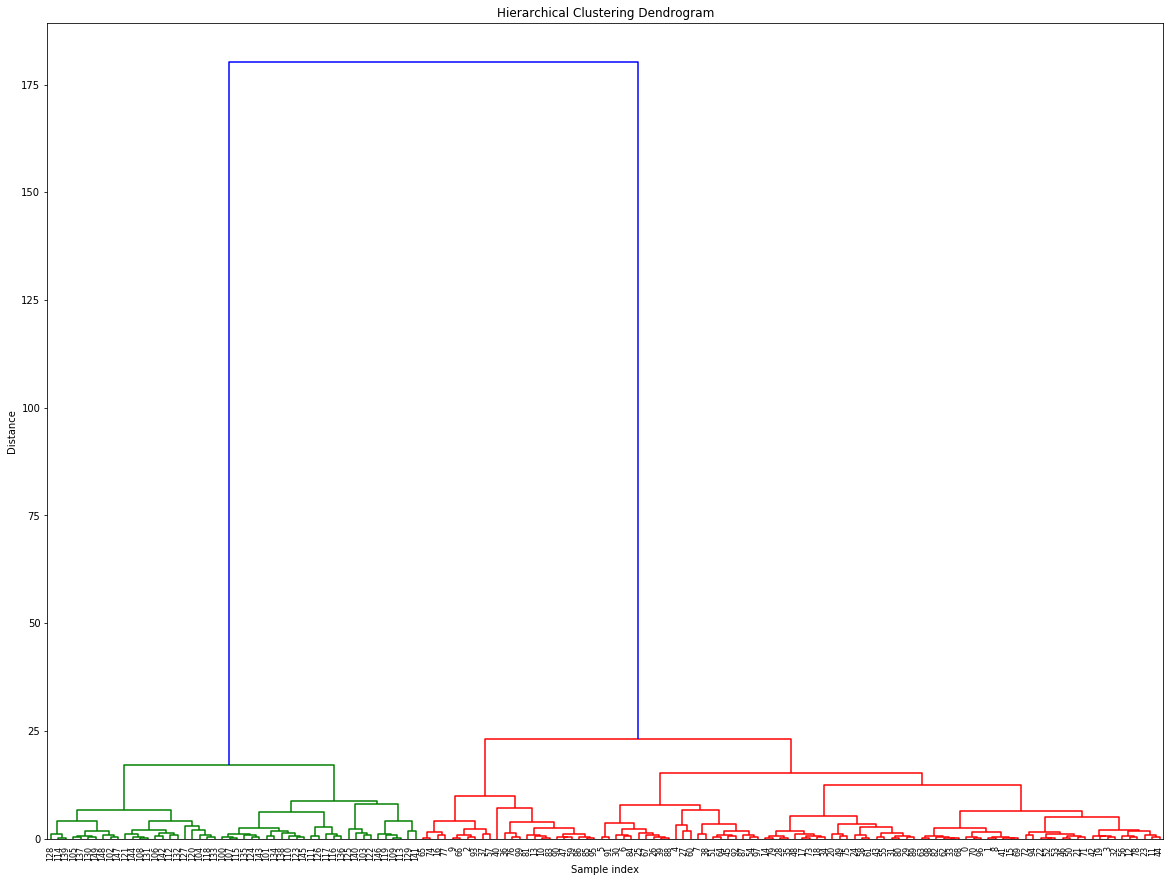

In [17]:
# calculate full dendrogram
plt.figure(figsize=(20, 15))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.0,  # rotates the x axis labels
    leaf_font_size=8.0   # font size for the x axis labels
)
plt.show()

## Dendrogram Truncation

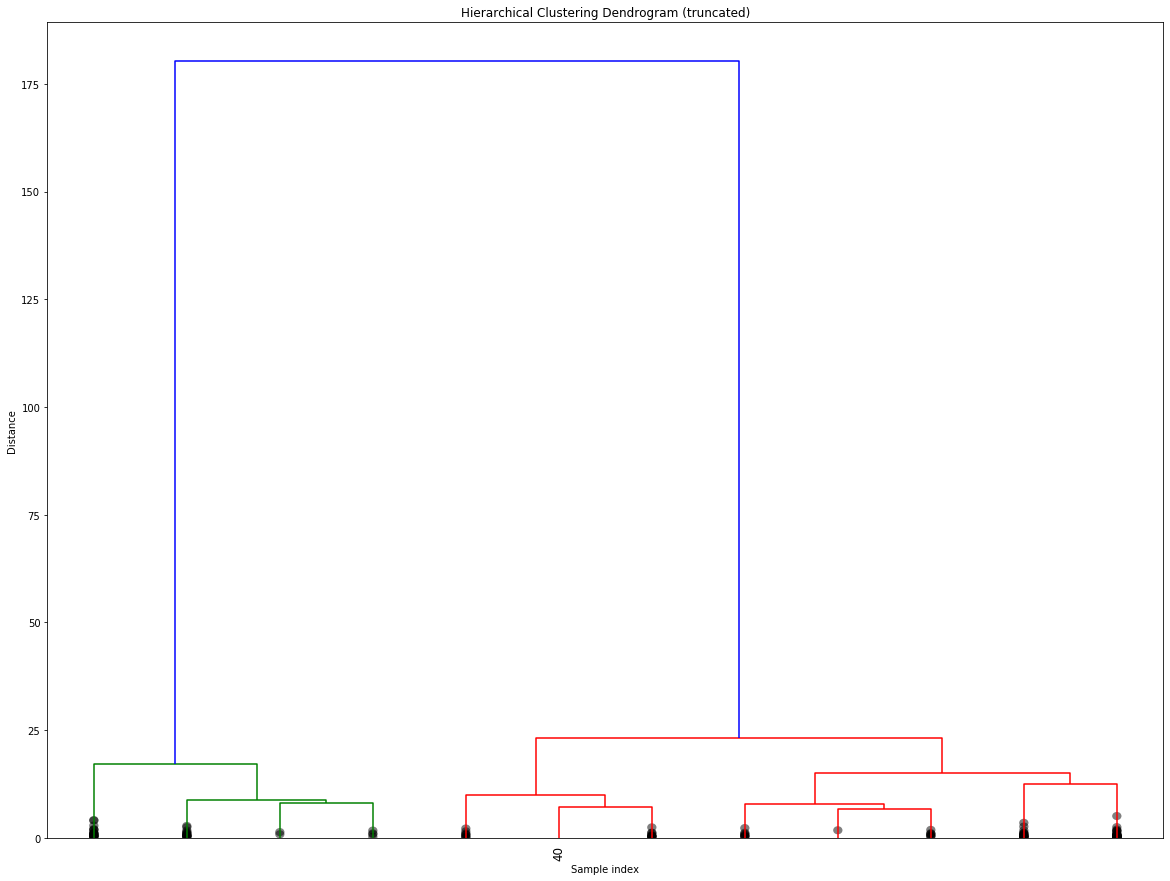

In [18]:
plt.figure(figsize=(20, 15))
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Sample index')
plt.ylabel('Distance')

dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,                   # show only the last p merged clusters
    show_leaf_counts=False, # otherwise numbers in brackets are counts
    show_contracted=True,   # to get a distribution impression in truncated branches
    leaf_rotation=90.0,     # rotates the x axis labels
    leaf_font_size=12.0     # font size for the x axis labels
)

plt.show()

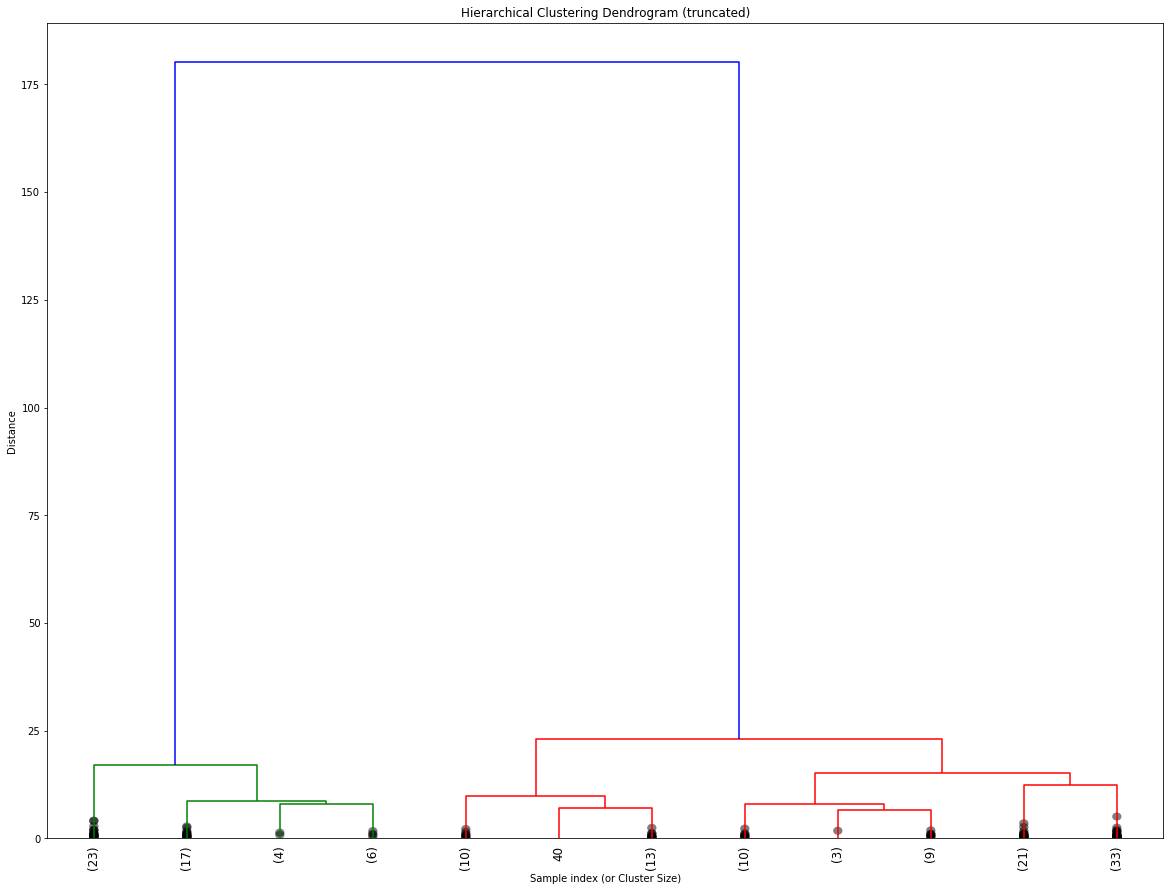

In [19]:
plt.figure(figsize=(20, 15))
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Sample index (or Cluster Size)')
plt.ylabel('Distance')

dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,                   # show only the last p merged clusters
    show_contracted=True,   # to get a distribution impression in truncated branches
    leaf_rotation=90.0,     # rotates the x axis labels
    leaf_font_size=12.0     # font size for the x axis labels
)

plt.show()

In [20]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d

    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('Sample index (or Cluster Size)')
        plt.ylabel('Distance')
        for i, d, c in zip(ddata['icoord'],
                           ddata['dcoord'],
                           ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate('%.3g' % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y = max_d, c='k')

    return ddata

In [21]:
#
def plot_fancy_dendrogram(Z, *args, **kwargs):
    plt.figure(figsize=(20, 15))

    fancy_dendrogram(
        Z,
        truncate_mode='lastp', 
        p=12,
        leaf_rotation=90.0,
        leaf_font_size=12.0,
        show_contracted=True,
        annotate_above=10,
        *args, **kwargs
    )
    plt.show()

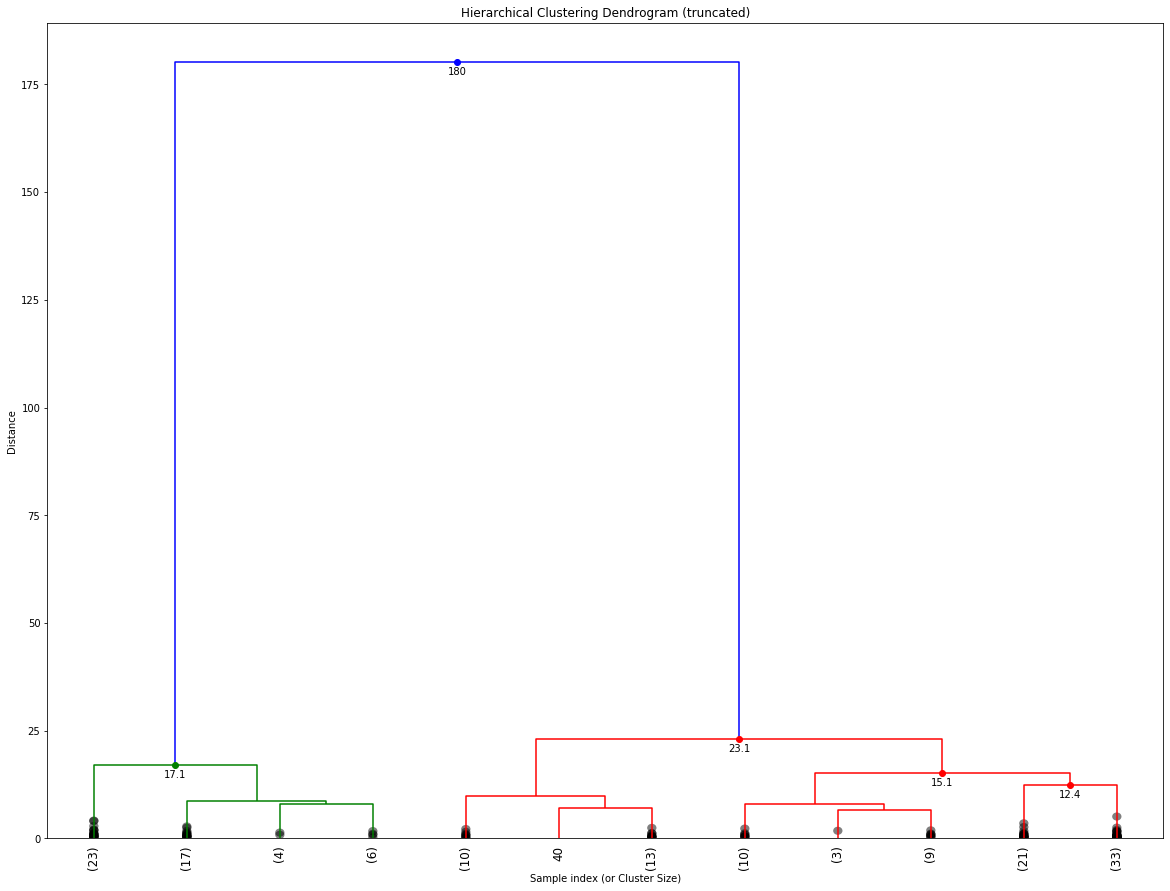

In [22]:
plot_fancy_dendrogram(Z)

## Selecting a Distance Cut-Off aka Determining the Number of Clusters

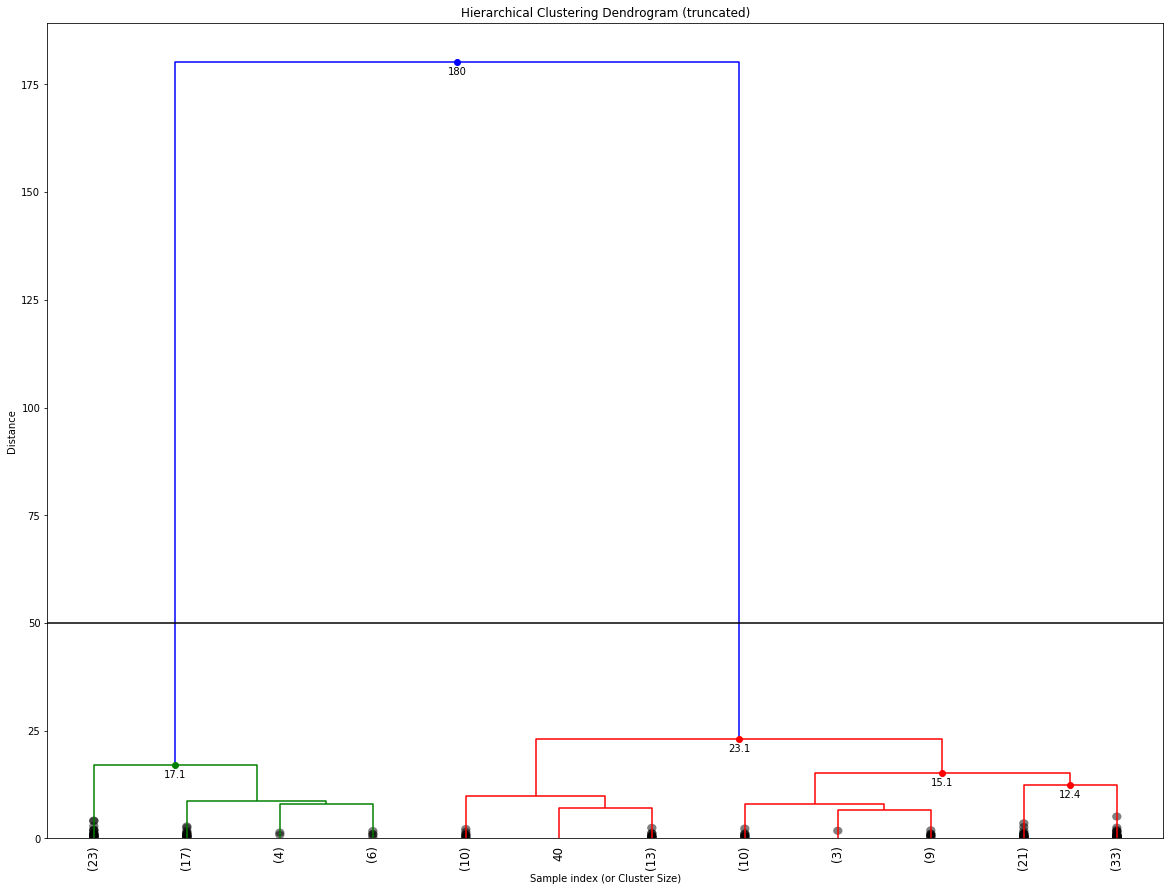

In [23]:
# set cut-off to 50
max_d = 50  # max_d as in max_distance

plot_fancy_dendrogram(Z, max_d=max_d)

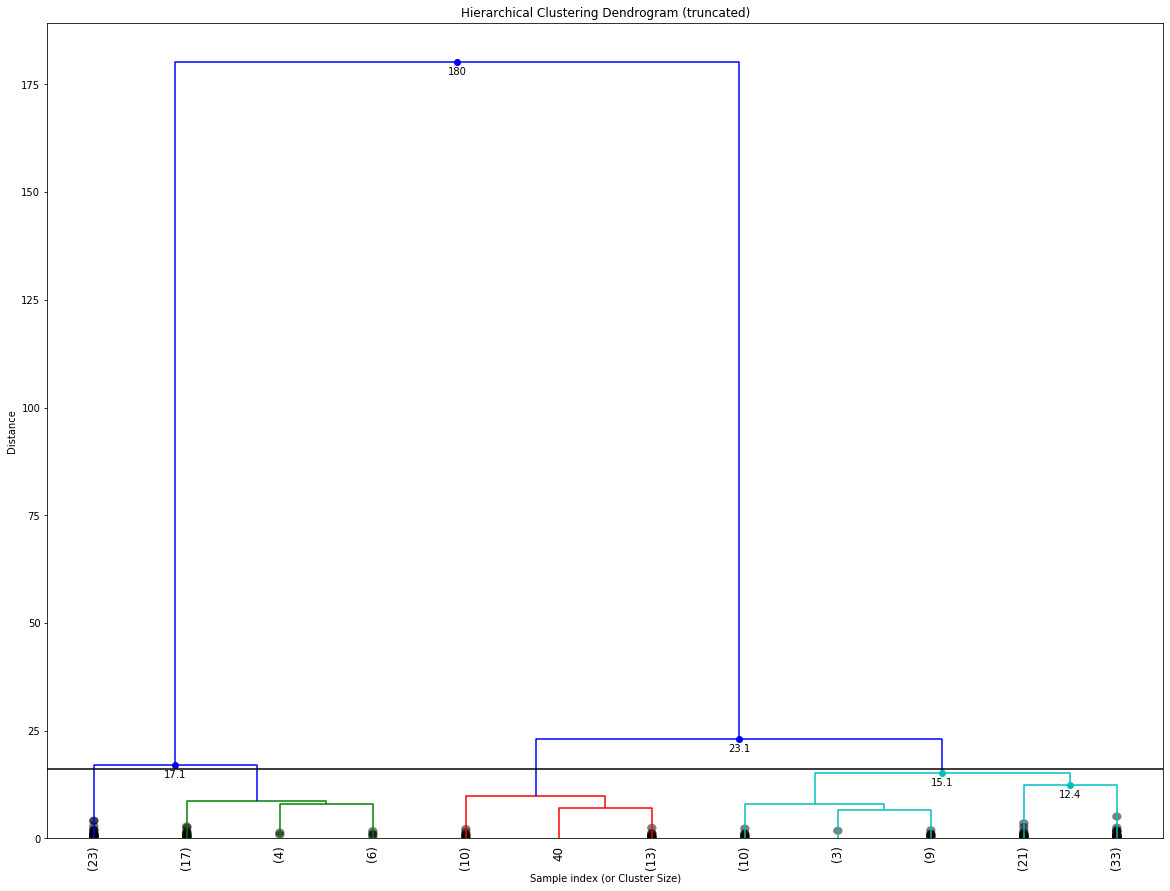

In [24]:
# set cut-off to 16
plot_fancy_dendrogram(Z, max_d=16)

## Automated Cut-Off Selection
### Inconsistency Method
The question driving the inconsistency method is **what makes a distance jump a jump?**. It answers this by comparing each cluster merge's height `h` to the average `avg` and normalizing it by the standard deviation `std` formed over the depth previous levels

$$inconsistency = {h − avg \over std}$$

In [25]:
from scipy.cluster.hierarchy import inconsistent

### `scipy.cluster.hierarchy.inconsistent`

`scipy.cluster.hierarchy.inconsistent(Z, d=2)`
Calculate inconsistency statistics on a linkage matrix.

### Parameters
- `Z` (ndarray): The `(n−1)` by 4 matrix encoding the linkage (hierarchical clustering). See [linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage) documentation for more information on its form.
- `d` (int, optional): The number of links up to `d` levels below each non-singleton cluster.

### Returns
- `R` (ndarray): A `(n−1)` by _4_ matrix where the i’th row contains the link statistics for the non-singleton cluster `i`. The link statistics are computed over the link heights for links `d` levels below the cluster `i`. `R[i,0]` and `R[i,1]` are the mean and standard deviation of the link heights, respectively; `R[i,2]` is the number of links included in the calculation; and `R[i,3]` is the inconsistency coefficient,

$${Z[i, 2] - R[i, 0] \over R[i, 1]}$$ 

In [26]:
def print_inconsistent(I):
    if I.ndim == 1:
        I = np.array((I, ))
    print(' #    Mean       Std    Links Coefficient')
    print('--- --------- --------- ----- -----------')
    for i in range(len(I)):
        print('%3d %9.5f %9.5f %5.0f %11.5f' % ((i,) + tuple(I[i])))

The following shows a matrix of the `avg`, `std`, `count`, `inconsistency` for each of the last 10 merges of our hierarchical clustering with `depth = 5`.

In [27]:
depth = 5
incons = inconsistent(Z, depth)
print_inconsistent(incons[-10:])

 #    Mean       Std    Links Coefficient
--- --------- --------- ----- -----------
  0   1.80875   2.17062    10     2.44277
  1   2.31732   2.19649    16     2.52742
  2   2.24512   2.44225     9     2.37659
  3   2.30462   2.44191    21     2.63875
  4   2.20673   2.68378    17     2.84582
  5   1.95309   2.58100    29     4.05821
  6   3.46173   3.53736    28     3.29444
  7   3.15857   3.54836    28     3.93328
  8   4.90210   5.10302    28     3.57042
  9  12.12200  32.15468    30     5.22936


Testing with `depth = 3`

In [28]:
depth = 3
incons = inconsistent(Z, depth)
print_inconsistent(incons[-10:])

 #    Mean       Std    Links Coefficient
--- --------- --------- ----- -----------
  0   3.63778   2.55561     4     1.35908
  1   3.89767   2.57216     7     1.54388
  2   3.05886   2.66707     6     1.87115
  3   4.92746   2.73260     7     1.39822
  4   4.76943   3.16277     6     1.60456
  5   5.27288   3.56605     7     2.00627
  6   8.22057   4.07583     7     1.69162
  7   7.83287   4.46681     7     2.07808
  8  11.38091   6.29430     7     1.86535
  9  37.25845  63.31539     7     2.25872


Inconsistency values heavily depend on the calculated averages based on the depth of the tree.

Another problem in its calculation is that the previous `d` levels' heights are not normally distributed, but expected to increase, so you cannot really just treat the current level as an **outlier** of a normal distribution, as it's expected to be bigger.

### Elbow Method
A variant of the [**Elbow Method**](https://en.wikipedia.org/wiki/Elbow_method_(clustering)) tries to find the clustering step where the acceleration of distance growth is the biggest (the **strongest elbow** of the blue line graph below, which is the highest value of the green graph below)

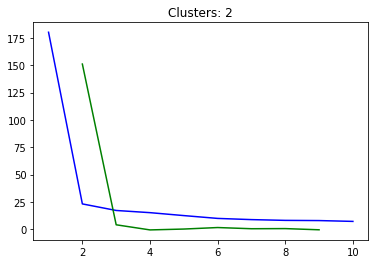

In [29]:
last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev, c='b')

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev, c='g')
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
plt.title('Clusters: %d' % k)
plt.show()

While this works in this simplistic example (the green line takes its maximum for `k=2`), it's flawed as well.

One issue of this method has to do with the way an **elbow** is defined: it need at least a right and a left point, which implies that this method will never be able to tell that all the data is in one single cluster only.

Another problem with this variant lies in the `np.diff(Z[:, 2], 2)` though. The order of the distances in `Z[:, 2]` is not properly reflecting the order of merges within one branch of the tree. In other words: there is no guarantee that the distance of `Z[i]` is contained in the branch of `Z[i+1]`. By simply computing the `np.diff(Z[:, 2], 2)` there is the assumption that this does not matter and just compare distance jumps from different branches of our merge tree.

Below is a counter example.

In [30]:
c = np.random.multivariate_normal([40, 40], [[20, 1], [1, 30]], size=[200, ])
d = np.random.multivariate_normal([80, 80], [[30, 1], [1, 30]], size=[200, ])
e = np.random.multivariate_normal([0, 100], [[100, 1], [1, 100]], size=[200, ])
X2 = np.concatenate((X, c, d, e))

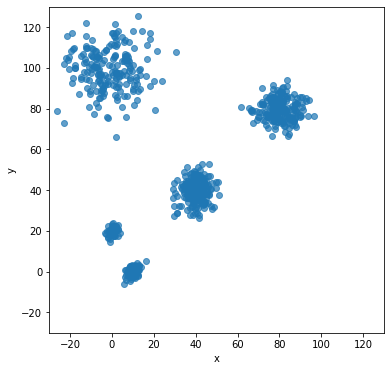

In [31]:
plt.figure(figsize=(6, 6))

plt.scatter(X2[:, 0], X2[:, 1], alpha=0.7)

plt.xlim(-30, 130)
plt.ylim(-30, 130)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [32]:
Z2 = linkage(X2, 'ward')

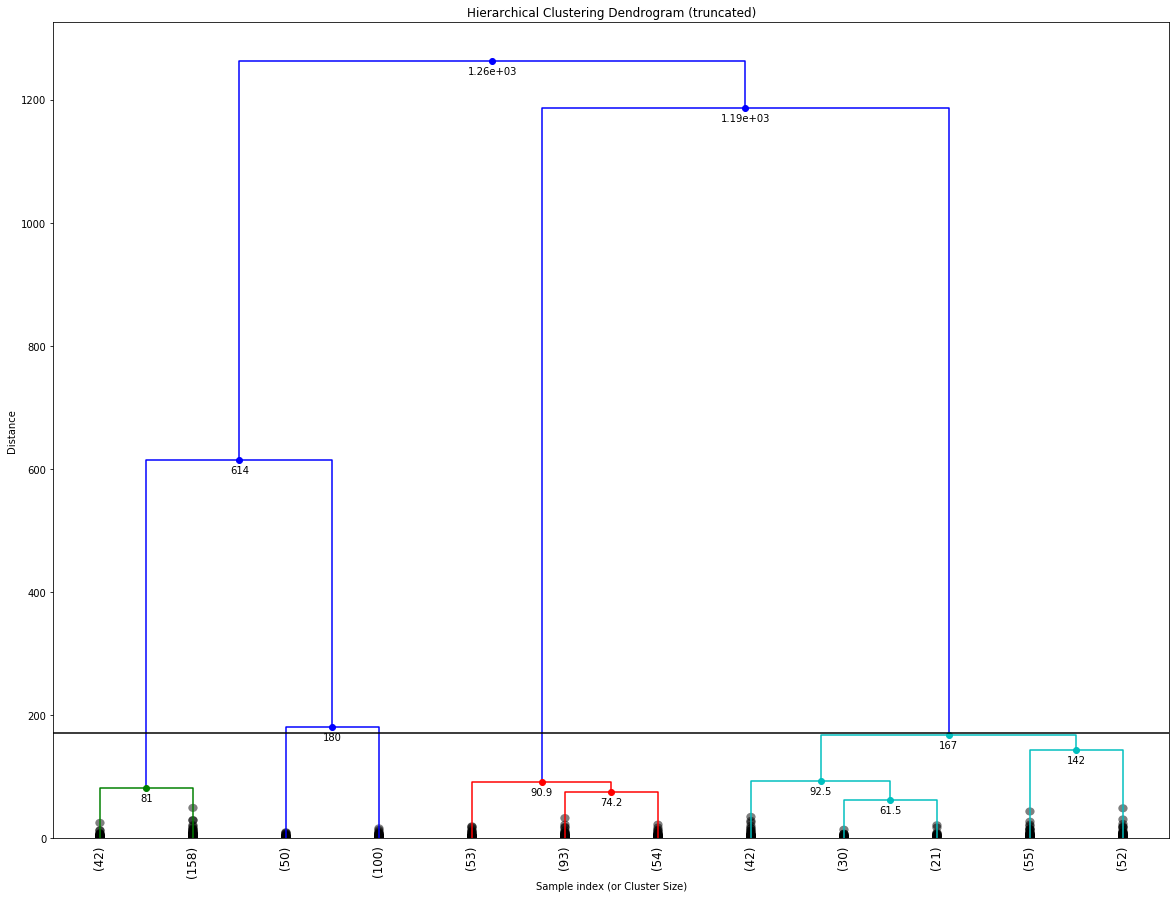

In [33]:
plot_fancy_dendrogram(Z2, max_d = 170)

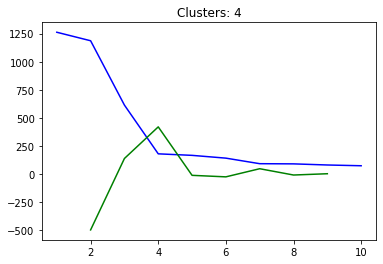

In [34]:
last = Z2[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev, c = 'b')

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev, c='g')
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
plt.title('Clusters: %d' % k)
plt.show()

In [35]:
depth = 5
incons = inconsistent(Z2, depth)
print_inconsistent(incons[-10:])

 #    Mean       Std    Links Coefficient
--- --------- --------- ----- -----------
  0  13.99222  15.56656    30     3.86585
  1  16.73941  18.56390    30     3.45983
  2  19.05945  20.53211    31     3.49953
  3  19.25574  20.82658    29     3.51907
  4  21.36116  26.77660    30     4.50256
  5  36.58101  37.08602    31     3.50761
  6  12.12200  32.15468    30     5.22936
  7  42.61370 111.38577    31     5.13038
  8  81.75199 208.31582    31     5.30448
  9 147.25602 307.95701    31     3.62150


Warning against blindly using any of those methods on an known dataset. These methods can give some indication, but it is necessary to always check if the results make sense using a dendrogram, which is a great tool for that (especially with higher dimensional data that cannot be simply visualied).